#### Lecture 2 : One variable (simple) linear regression

#### Outline  
2.1 Linear regression  
2.2 Learning algorithm  
2.3 Iterative method: Gradient descent  
2.4 Gradient descent for linear regression  

**Gradient descent**


x.shape = (3, 1) y.shape = (3,)
Converged, iterations:  151 / 1000
theta0 = [0.50207928] theta1 = [0.88586827]
intercept = 0.5714285714285714 slope = 0.8571428571428571


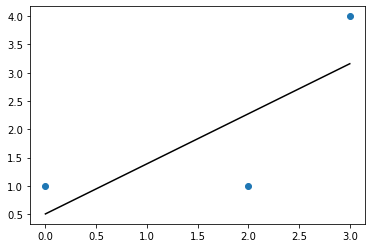

In [19]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats

def cost_function(theta0, theta1, x, y, m):
    c = sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])
    return c

def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
  
    t1 = np.random.random(x.shape[1])

    # total error, J(theta)
    J = cost_function(t0,t1,x,y,m) 

    # Iterate Loop
    while not converged:
        grad0 = sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
        
        # update theta
        t0 = temp0
        t1 = temp1

        # error
        e = cost_function(t0,t1,x,y,m)

        if abs(J-e) <= ep:
           print("Converged, iterations: ", iter, "/", max_iter)
           converged = True
    
        J = e   # update error s
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1


if __name__ == '__main__':

    #x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
    x = np.array([[0,2,3]]).T # or x = np.array([[0],[2],[3]])
    y = np.array([1,1,4])
    print("x.shape = %s y.shape = %s" %(x.shape, y.shape))
    alpha = 0.01 # learning rate

    theta0, theta1 = gradient_descent(alpha, x, y, max_iter=1000)
    print (("theta0 = %s theta1 = %s") %(theta0, theta1)) 

    # check with scipy linear regression 
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
    print (("intercept = %s slope = %s") %(intercept, slope))

    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

    plt.plot(x,y,'o')
    plt.plot(x,y_predict,'k-')
    plt.show()

## สรุป Gradient dessent

https://khasathan.in.th/archives/1335/machine-learning-9-gradient-descent/
https://datarockie.com/2019/02/26/ml101-gradient-descent/  

**Implementation**  

เราสามารถ implement gradient descent ได้ใน 4 ขั้นตอน  
1.แรนดอมค่า intercept และ slope  
2.คำนวณ MSE ของโมเดลที่ใช้ intercept และ slope นี้  
3.ดิฟหา gradient เพื่อปรับค่า intercept และ slope ให้ MSE ต่ำลง  
4.ทำซ้ำ step 2-3 ไปเรื่อยๆจนกว่าโมเดลจะ converged หรือครบรอบ iterations ที่เรากำหนด  


ถ้าเราเลือก learning rate ต่ำเกินไป gradient descent จะใช้เวลานานกว่าที่โมเดลจะ converged  

อัลกอริทึมของ gradient descent เป็น iterative algorithm สามารถเขียนได้เป็น  

repeat until convergence {

θj :=  θj - α(partial J(θ} / partialθ)     (j = 0 และ j = 1)

}

เมื่อเราแทนค่า J ที่เป็น cost function ของ linear regression จะได้

repeat until convergence {

θ0 := θ0 - α(sum_{i=1 ถึง m}(h(x^i) - y^i)
θ1 := θ1 - α(sum_{i=1 ถึง m}(h(x^i) - y^i) x^i

}

การอัปเดต θ เป็นการอัปเดตแบบ Simultaneously หมายความว่าคำนวณพจน์ทางขวาของเครื่องหมาย := ก่อนค่อย assign กลับคืนให้ตัวแปรทางซ้ายมือ หรือถ้ามีการใช้ตัวแปรก่อนหน้าก็ให้เอาค่าก่อนอัปเดตมาคำนวณได้เลยไม่ได้อัปเดตเป็น chain ต่อกันแต่เป็นการอัปเดตพร้อมๆ กัน ซึ่งการอัปเดตพร้อมๆ กันนี้บางครั้งเราจะเรียกว่า Batch Gradient Descent

จากอัลกอริทึมข้างบนเราจะเห็นตัวแปรเพิ่มขึ้นมาคือ α (alpha) ซึ่งเรียกว่า Learning rate ตัวแปรนี้เป็นค่าคงที่ค่าหนึ่งซึ่งเป็นตัวกำหนดว่าแต่ละรอบค่า gradient จะขยับทีะเท่าไหร่ ถ้า α น้อยเกินไปการคำนวณ gradient ก็จะช้า แต่ถ้า  α มากเกินไปก็จะเกิดปัญหาที่เรียกว่า Overshoot คือแทนที่แต่ละรอบ const function จะลดลงเรื่อยๆ ถ้าเพิ่มขึ้นเรื่อยๆ ควรลดค่า α ลง

In [2]:
# การทำงานของ  .shape จะอ่านค่าขนาดของ array ได้จำนวน แถวxหลัก  =>  จะได้ tuple (_,_)
# .shape[1] =>  จะได้ index ของ tuple ตำแหน่ง 0 = จำนวนแถว
# .shape[0] =>  จะได้ index ของ tuple ตำแหน่ง 1 = จำนวนหลัก

import numpy as np
x = np.array([[0,2,3]])
x1 = np.array([[0,2,3]]).T
print(x)
print(x1)

print('-'*40)

m = x1.shape
m1 = x1.shape[0]
m2 = x1.shape[1]
print(m)
print(m1)
print(m2)

print('-'*40)

for i in range(3):
    print(i)
    
print('-'*40)
# ใช้ 2 Function np. and random. 
t0 = np.random.random(x1.shape[1])
t1 = np.random.random(x1.shape[0])
print(f't0 = {t0} ไม่เท่ากับ t1 = {t1}')

[[0 2 3]]
[[0]
 [2]
 [3]]
----------------------------------------
(3, 1)
3
1
----------------------------------------
0
1
2
----------------------------------------
t0 = [0.38054568] ไม่เท่ากับ t1 = [0.58533645 0.18593211 0.11093264]


In [3]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt
from scipy import stats

C:\Users\kodch\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# มาจากสมการ Cost Function: J(θ1,θ2) ; input θ1,θ2, x , y, m(sum ตั้งแต่ i=1 ถึง m) 
#Parameters : θ1,θ2
# Goal : minimize J(θ1,θ2)

# Hypotesis : h(x) = θ0 + θ1x
# Cost Function : Cost Function: J(θ1,θ2) = Σ(h(x[i])-y[i])^2 ; sum ตั้งแต่ i=1 ถึง m

def cost_function(theta0, theta1, x, y, m):
    c = sum([(theta0 + theta1*x[i] - y[i])**2 for i in range(m)])   # **** x[i], y[i] = index
    return c

In [7]:
# max_iter = จำนวนรอบสูงสุด (iterations) ที่เราให้ gradient descent อัพเดทค่า weights ในโมเดล
# ep=0.0001 => learning rate = 0.01,0.001
def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):

    converged = False
    iter = 0
    m = x.shape[0]
# number of samples ; .shape = check dimensional => 3Rows * 1 Columns = (3,1) => .shape[0] = 3
    
    # initial theta         
    # **** Random ค่า θ (เซต้า theta) X1กับ X2 ที่ดีที่สุด ****
    t0 = np.random.random(x.shape[1])    #.shape[1] = 1 
    t1 = np.random.random(x.shape[1])    #.shape[1] = 1
    
    # total error, J(θ1,θ2) = Σ(h(x[i])-y[i])^2 ; sum ตั้งแต่ i=1 ถึง m
    J = cost_function(t0,t1,x,y,m)     # **** cost function

    # Iterate Loop
    while not converged:         # ****  ข้างบน converged = False
        grad0 = sum([(t0 + t1*x[i] - y[i]) for i in range(m)])      # ****#compute costfunction หา minimize ค่า θ(เซต้า)1  
        grad1 = sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)]) # ****#compute costfunction  หา minimize ค่า θ(เซต้า) 2    

        # update the theta_temp
        temp0 = t0 - alpha * (1/m) * grad0  # **** θ1 mse 
        temp1 = t1 - alpha * (1/m) * grad1  # **** θ2 mse

        # update theta
        t0 = temp0    # ****update weights with gradient update minimize ค่า θ (เซต้า) 1
        t1 = temp1    # ****update weights with gradient update minimize ค่า θ (เซต้า) 2

        # error
        e = cost_function(t0,t1,x,y,m)  
        
        # **** minimum error, sse
        if abs(J-e) <= ep:          # **** |J -e| <=  ep=0.0001
           print("Converged, iterations: ", iter, "/", max_iter)
           converged = True
    
        J = e   # update error s    ## **** ถ้า J = e ให้บวก 1 ใน iter = 0 
        iter += 1  # update iter      
    
    
        #**** if iteration hits max_iter, program ends                      
        if iter == max_iter:        # **** iter = 0 , max_iter=10000
            print('Max interactions exceeded!')
            converged = True

    return t0,t1

x => [[0]
 [2]
 [3]]
x.shape = (3, 1) y.shape = (3,)
Converged, iterations:  65 / 1000
theta0 = [0.56763862] theta1 = [0.85059521]
intercept = 0.5714285714285714 slope = 0.8571428571428571


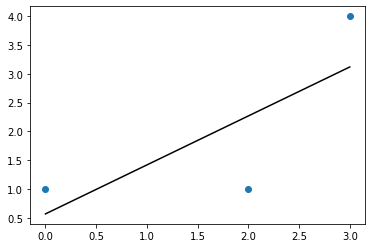

In [8]:
if __name__ == '__main__':

    #x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise=35) 
    x = np.array([[0,2,3]]).T # or x = np.array([[0],[2],[3]])
    print('x =>', x)
    y = np.array([1,1,4])
    print("x.shape = %s y.shape = %s" %(x.shape, y.shape))
    alpha = 0.01 # learning rate

    theta0, theta1 = gradient_descent(alpha, x, y, max_iter=1000)
    print (("theta0 = %s theta1 = %s") %(theta0, theta1)) 

    # check with scipy linear regression 
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
    print (("intercept = %s slope = %s") %(intercept, slope))

    # plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

    plt.plot(x,y,'o')
    plt.plot(x,y_predict,'k-')
    plt.show()